In [79]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [80]:
df = pd.read_csv("dataset/50_placement.csv")
df.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [82]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [83]:
df.duplicated().sum()

0

In [84]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


# 1. Univariate Analysis:

Text(0.5, 1.0, 'Box_Plot')

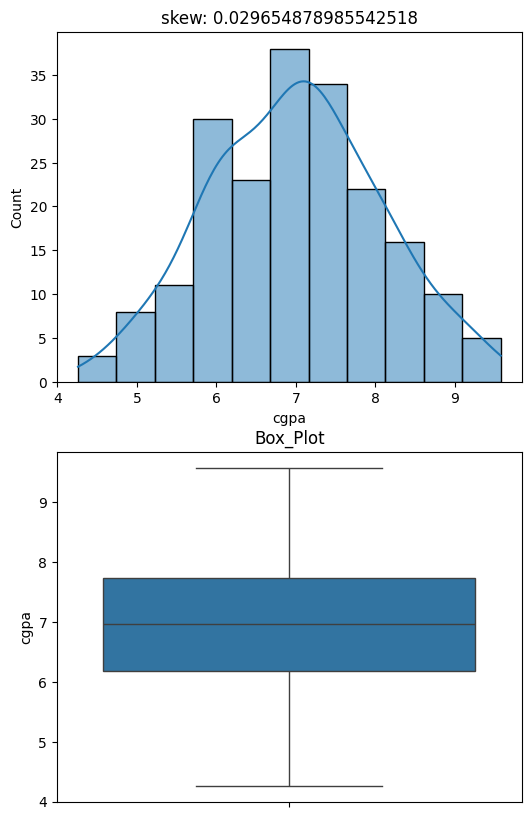

In [85]:
# histrogram, kdeplot, boxplot

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,10))
sns.histplot(df["cgpa"],kde=True,ax=ax[0])
ax[0].set_title(f"skew: {df["cgpa"].skew()}")

sns.boxplot(df["cgpa"],ax=ax[1])
ax[1].set_title("Box_Plot")

# 02. multivariate analysis:

<Axes: xlabel='cgpa', ylabel='package'>

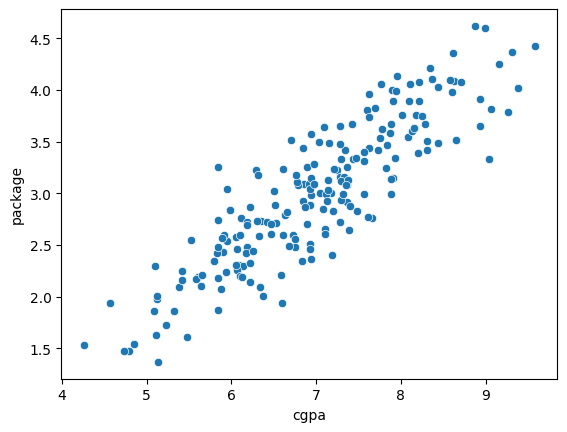

In [86]:
sns.scatterplot(x=df['cgpa'],y=df['package'])

In [87]:
X = df.iloc[:,0]
y = df.iloc[:,1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [88]:
# convert it to numpy array:
X_train.values

array([7.14, 8.93, 5.42, 5.1 , 7.77, 6.76, 6.89, 6.68, 7.91, 7.89, 8.71,
       7.95, 6.61, 6.26, 6.53, 6.42, 5.11, 6.09, 6.93, 7.04, 5.94, 6.05,
       5.83, 5.95, 9.31, 5.58, 7.88, 6.13, 7.76, 4.85, 6.19, 8.6 , 6.07,
       7.18, 5.12, 7.39, 8.25, 8.28, 7.13, 7.35, 5.66, 5.99, 8.01, 7.14,
       6.34, 6.89, 5.42, 6.47, 7.69, 7.4 , 7.28, 5.95, 7.38, 6.93, 8.99,
       7.36, 7.08, 5.38, 7.56, 8.22, 5.84, 6.78, 7.19, 7.28, 6.79, 6.12,
       6.85, 8.2 , 6.84, 7.37, 6.22, 6.61, 5.23, 7.21, 6.85, 6.19, 7.3 ,
       6.17, 5.89, 8.09, 7.11, 4.26, 6.94, 5.98, 6.71, 7.33, 9.06, 6.1 ,
       5.48, 6.1 , 7.56, 7.29, 5.84, 7.48, 7.61, 5.79, 5.61, 7.34, 9.38,
       7.91, 6.94, 7.94, 8.31, 6.96, 6.93, 7.11, 8.44, 8.18, 6.66, 8.44,
       7.12, 6.3 , 5.84, 6.98, 7.63, 5.64, 7.43, 8.87, 7.84, 5.84, 9.58,
       8.37, 7.63, 6.31, 6.5 , 8.11, 6.07, 4.73, 7.3 , 6.51, 7.28, 6.92,
       6.35, 8.62, 7.05, 9.26, 6.33, 6.22, 6.94, 5.13, 8.13, 5.9 , 9.04,
       6.06, 7.57, 8.1 , 9.16, 5.84, 7.89, 6.63, 7.

In [89]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

LinearRegression()

In [90]:
print(f"X_test[0]: {X_test.values[0]}")
print(f"y_test[0]: {y_test.values[0]}")
lr.predict(X=X_test.values[0].reshape(1,1)) # result is not good should be 4.1

X_test[0]: 8.58
y_test[0]: 4.1


array([[3.89111601]])

In [91]:
print(f"X_test[0]: {X_test.values[1]}")
print(f"y_test[0]: {y_test.values[1]}")
lr.predict(X=X_test.values[1].reshape(1,1)) # result is not good should be 3.49

X_test[0]: 7.15
y_test[0]: 3.49


array([[3.09324469]])


# Visualize:


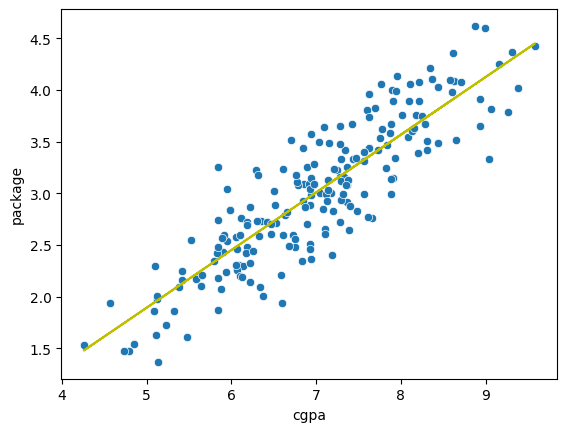

In [92]:
ax = plt.subplot(1,1,1)
sns.scatterplot(x=df['cgpa'],y=df['package'],ax=ax)
plt.plot(X_train.values.reshape(160,1),lr.predict(X_train.values.reshape(160,1)),color="y")

In [93]:
# the value of slope and intercept 
m = lr.coef_
c = lr.intercept_
print("Slope(m): ",m)
print("intercept(c):",c)

Slope(m):  [[0.55795197]]
intercept(c): [-0.89611192]


In [94]:
x = X_test.values[1]
print(f"X_test[0]: {X_test.values[1]}")
print(f"y_test[0]: {y_test.values[1]}")

print()
print(lr.predict(X=X_test.values[1].reshape(1,1))) # result is not good should be 4.1
print()
m*x + c 

X_test[0]: 7.15
y_test[0]: 3.49

[[3.09324469]]



array([[3.09324469]])